In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

In [52]:
def eval_model(file, model_name):
    result_df = pd.read_csv(file)
    print('mean dice score:', str(result_df['dice'].mean()))
    print('Number of test images:', str(len(result_df['individual_image_name'])))
    individual_df = result_df.copy()
    individual_df['model'] = model_name.strip('--')
    individual_df.drop(columns=['individual_image_name', 'model_name'], inplace=True)
    return individual_df

def get_dataset_parameters(dataset):
    dataset_type = dataset['dataset_type']
    synth_data_ratio_list = dataset['synth_data_ratio_list']
    real_data_ratio_list = dataset['real_data_ratio_list']
    real_data_ratio_baseline = dataset['real_data_ratio_baseline'] 
    results_path = dataset['results_path']
    return dataset_type, synth_data_ratio_list, real_data_ratio_list, real_data_ratio_baseline, results_path

def eval_all_models_real_data_proportion(dataset):
    dataset_type, synth_data_ratio_list, real_data_ratio_list, real_data_ratio_baseline, results_path = get_dataset_parameters(dataset)
    all_individual_df = pd.DataFrame()
    for real_data_ratio in real_data_ratio_baseline:
        model_name = dataset_type + '_' + str(real_data_ratio) + '--'
        files_list = os.path.join(results_path, f'*{model_name}*')
        all_models = glob.glob(files_list)
        all_models = [model for model in all_models if '--test_images_' + dataset_type in model]
        print(all_models)
        for i, file in enumerate(all_models):
            individual_df = eval_model(file, model_name)
            all_individual_df = pd.concat([all_individual_df, individual_df])
    return all_individual_df

def eval_all_models_subset(dataset, method=''):
    dataset_type, synth_data_ratio_list, real_data_ratio_list, real_data_ratio_baseline, results_path = get_dataset_parameters(dataset)
    all_individual_df = pd.DataFrame()
    for real_data_ratio in real_data_ratio_list:
        for ratio in synth_data_ratio_list:
            if method != '':
                if dataset_type == 'real_HAM': 
                    model_name = dataset_type + '_' + str(1.0) + '_'+ method + '_' +str(ratio)
                elif dataset_type == 'real_ISIC':
                    model_name = dataset_type + '_' + str(1.0) + '_'+ method + '_' +str(ratio)             
                print(model_name)
            else:    
                model_name = dataset_type + '_' + str(real_data_ratio) + '--'
            files_list = os.path.join(results_path, f'*{model_name}*')
            all_models = glob.glob(files_list)
            print(all_models)
            for i, file in enumerate(all_models):
                individual_df = eval_model(file, model_name)
                all_individual_df = pd.concat([all_individual_df, individual_df])
    return all_individual_df
    dataset_type = dataset['dataset_type']
    synth_data_ratio_list = dataset['synth_data_ratio_list']
    real_data_ratio_list = dataset['real_data_ratio_list']
    real_data_ratio_baseline = dataset['real_data_ratio_baseline'] 
    results_path = dataset['results_path']
    return dataset_type, synth_data_ratio_list, real_data_ratio_list, real_data_ratio_baseline, results_path

def eval_all_models_real_data_proportion(dataset, one_model=True):
    dataset_type, synth_data_ratio_list, real_data_ratio_list, real_data_ratio_baseline, results_path = get_dataset_parameters(dataset)
    all_individual_df = pd.DataFrame()
    for real_data_ratio in real_data_ratio_baseline:
        model_name = 'MODEL-all_tones_' + dataset_type + '_' + str(real_data_ratio) + '--'
        files_list = os.path.join(results_path, f'*{model_name}*')
        all_models = glob.glob(files_list)
        if one_model == True:
            all_models = [model for model in all_models if '--00--' in model]
            all_models = [model for model in all_models if '--test_images_' + dataset_type in model]
        print(all_models)
        for i, file in enumerate(all_models):
            individual_df = eval_model(file, model_name)
            all_individual_df = pd.concat([all_individual_df, individual_df])
    return all_individual_df

def eval_all_models_subset(dataset, one_model=True, method=''):
    dataset_type, synth_data_ratio_list, real_data_ratio_list, real_data_ratio_baseline, results_path = get_dataset_parameters(dataset)
    all_individual_df = pd.DataFrame()
    for real_data_ratio in real_data_ratio_list:
        for ratio in synth_data_ratio_list:
            if method != '':
                if dataset_type == 'real_HAM': 
                    model_name = 'MODEL-dataset_scripts_new--all_tones_' + dataset_type + '_' + str(1.0) + '_'+ method + '_' +str(ratio) + '_' + 'cropped'
                elif dataset_type == 'real_ISIC':
                    model_name = 'MODEL-all_tones_' + dataset_type + '_' + str(1.0) + '_'+ method + '_' +str(ratio)             
                print(model_name)
            else:    
                model_name = 'MODEL-all_tones_' + dataset_type + '_' + str(real_data_ratio) + '--'
            files_list = os.path.join(results_path, f'*{model_name}*')
            print(files_list)
            all_models = glob.glob(files_list)
            if one_model == True:
                all_models = [model for model in all_models if '--00--' in model]
            print(all_models)
            for i, file in enumerate(all_models):
                individual_df = eval_model(file, model_name)
                all_individual_df = pd.concat([all_individual_df, individual_df])
    return all_individual_df

In [53]:
def plot_individual_dice_agg(df, x_tick_labels, filtered_dice, dataset_type, ax, alpha, pattern, include_baseline=False, reverse_palette=False):
    if filtered_dice == True:
        df = df[df['filter'] == 1]
    y_value = 'dice'
    df1 = df.copy()
    bar_width = 0.9

    sns.set(style="whitegrid")
    palette0 = sns.color_palette('OrRd', n_colors=len(x_tick_labels))
    if include_baseline == True:
        palette=['lightgrey']+palette0[1:]
    else:
        palette=palette0
    if reverse_palette == True:
        palette = palette[::-1]
        
    h = sns.barplot(
        data=df1, 
        x="model",
        y=y_value,
        palette=palette,
        ax=ax,
        width=bar_width,
        linewidth=0.8,
        edgecolor='black', 
        alpha=alpha, 
        hatch=pattern
    )
    ax.set_xlabel(dataset_type, fontsize=16)
    ax.set_ylabel("Dice Score", fontsize=16)
    ax.set_xlabel("Ratio of real to synthetic", fontsize=16)
    ax.tick_params(axis='x', labelsize=12, rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylim([0,1.0])
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    h.set_xticklabels(x_tick_labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Using S-SYNTH to augment training set


In [54]:
dataset = {
'dataset_type' : "real_ISIC", #patient dataset
'synth_data_ratio_list' : ['0.2', '0.4', '0.6', '0.8', '1.0'],
'real_data_ratio_list' : ['1.0'],
'real_data_ratio_baseline' : ['1.0'], #ratio of the real data to be used
'results_path' : '../../data/outputs/segmentation_results/', 
}

MODEL-all_tones_real_ISIC_1.0_add_synth_0.2
../../data/outputs/segmentation_results/*MODEL-all_tones_real_ISIC_1.0_add_synth_0.2*
['../../data/outputs/segmentation_results/MODEL-all_tones_real_ISIC_1.0_add_synth_0.2--00--dsd_i01--n-dsd_i01_s-128_b-32_t-250_sc-linear_best.pth-DATASET-all_tones_real_ISIC_1.0_add_synth_0.2--test_images_real_ISIC.csv']
mean dice score: 0.8281007389932011
Number of test images: 520
MODEL-all_tones_real_ISIC_1.0_add_synth_0.4
../../data/outputs/segmentation_results/*MODEL-all_tones_real_ISIC_1.0_add_synth_0.4*
['../../data/outputs/segmentation_results/MODEL-all_tones_real_ISIC_1.0_add_synth_0.4--00--dsd_i01--n-dsd_i01_s-128_b-32_t-250_sc-linear_best.pth-DATASET-all_tones_real_ISIC_1.0_add_synth_0.4--test_images_real_ISIC.csv']
mean dice score: 0.8238898935638225
Number of test images: 520
MODEL-all_tones_real_ISIC_1.0_add_synth_0.6
../../data/outputs/segmentation_results/*MODEL-all_tones_real_ISIC_1.0_add_synth_0.6*
['../../data/outputs/segmentation_results/

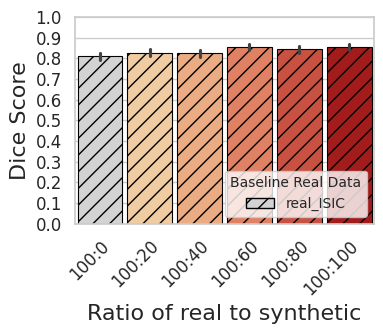

In [55]:
pattern = ["//"]
alpha = 1
figsize=(4,3.5)
method = 'add_synth' #'replace_with_synth' or #'add_synth'

fig, ax = plt.subplots(1,1, figsize=figsize)

all_individual_df = eval_all_models_subset(dataset, method=method)
all_individual_df_baseline = eval_all_models_real_data_proportion(dataset)
all_individual_df = pd.concat([all_individual_df_baseline, all_individual_df])
x_tick_labels = ['100:0', '100:20', '100:40', '100:60', '100:80', '100:100']
plot_individual_dice_agg(all_individual_df, x_tick_labels, filtered_dice=False, dataset_type="", ax=ax, alpha=alpha, pattern=pattern, include_baseline=True)

palette0 = sns.color_palette('OrRd', n_colors=len(x_tick_labels))
handle = mpatches.Patch(edgecolor='black', facecolor='lightgrey', label=dataset["dataset_type"], hatch='//', alpha=alpha)
ax.legend(handles=[handle], title='Baseline Real Data', loc='lower right', fancybox=True, shadow=False, ncol=1, title_fontsize=10, fontsize=10)

plt.tight_layout()
fig.align_labels()